In [1]:
#import packages required for clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import pca
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import *
from IPython.display import display
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
#read the data
data=pd.read_csv('Wine.csv')

In [3]:
data.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
105,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315,2
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480,2
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
data.isnull().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
Customer_Segment        False
dtype: bool

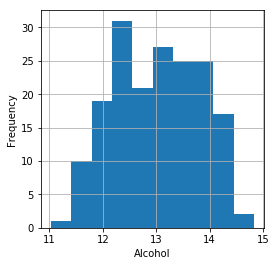

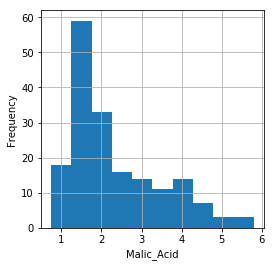

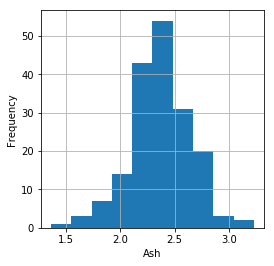

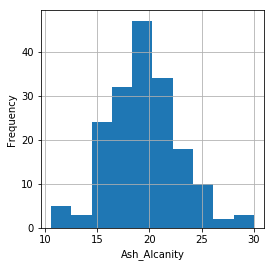

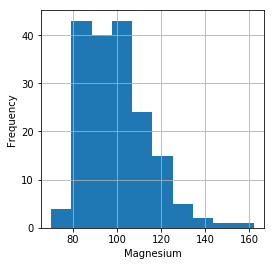

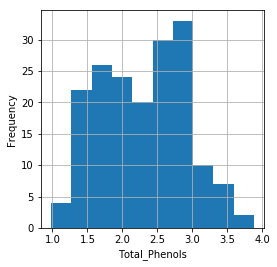

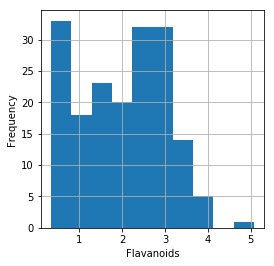

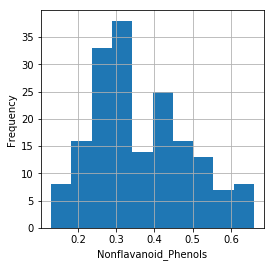

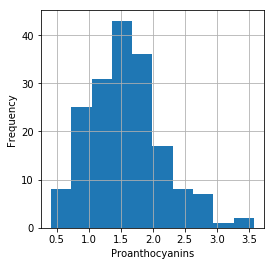

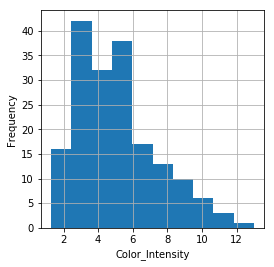

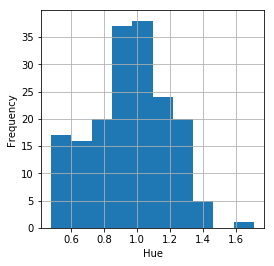

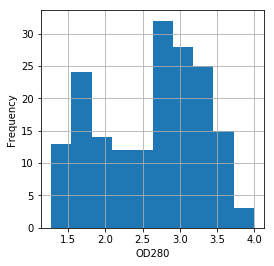

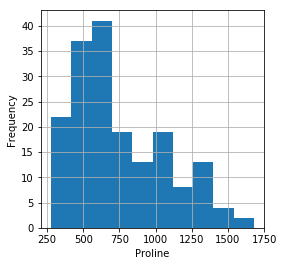

In [19]:
for i in data.columns:
    plt.figure(figsize=(4,4))
    data[i].hist()
    plt.xlabel(str(i))
    plt.ylabel("Frequency")

In [11]:
#drop the column which is not useful
data.drop('Customer_Segment',axis=1,inplace=True)

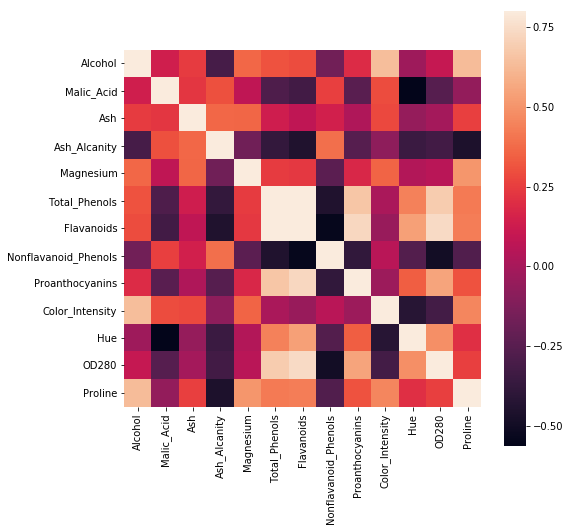

In [13]:
corrmat = data.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [14]:
#preprocess the data and apply mean normalizaion for every column
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(data)
X_scaled_array = scaler.transform(data)
X_scaled = pd.DataFrame(X_scaled_array, columns = data.columns)

In [15]:
#model
#apply kmeans clustering algorithm
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_scaled)
#cluster centers
print(kmeans.cluster_centers_)

[[-0.07297886  0.66451047  0.18987553  0.51662255 -0.15468782 -0.94370681
  -1.04663574  0.83794915 -0.71615568  0.54346866 -0.88207198 -1.06931809
  -0.45318098]
 [ 0.04197899 -0.38224053 -0.10922044 -0.29717226  0.08897972  0.5428402
   0.60204711 -0.48200615  0.41194796 -0.31261472  0.50738654  0.61509448
   0.26067933]]


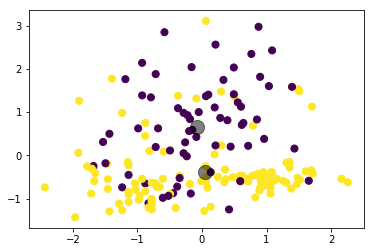

For n_clusters = 2, silhouette score is 0.2683134097105213)


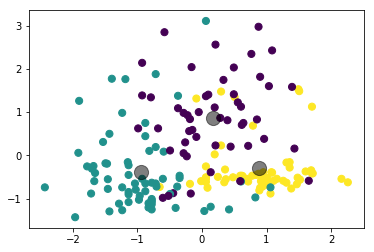

For n_clusters = 3, silhouette score is 0.28594199657074876)


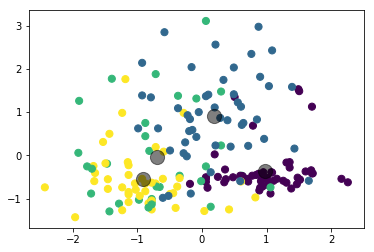

For n_clusters = 4, silhouette score is 0.25173343011696475)


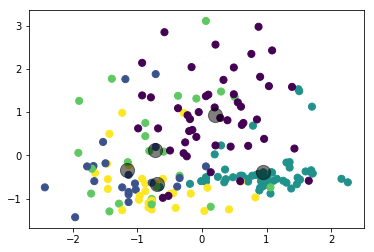

For n_clusters = 5, silhouette score is 0.23187479572412723)


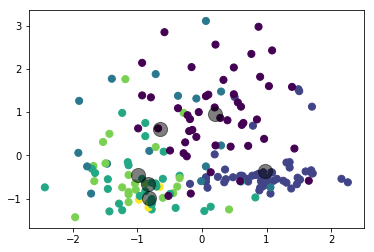

For n_clusters = 6, silhouette score is 0.23964277899912415)


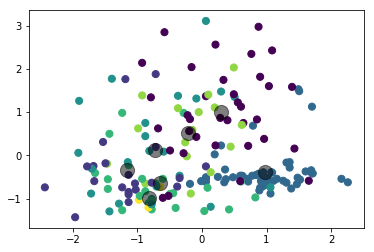

For n_clusters = 7, silhouette score is 0.1977124515910614)


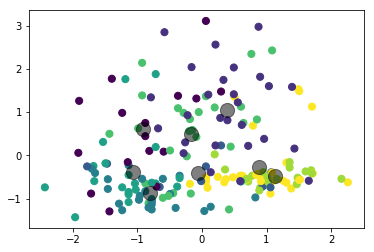

For n_clusters = 8, silhouette score is 0.133114891253478)


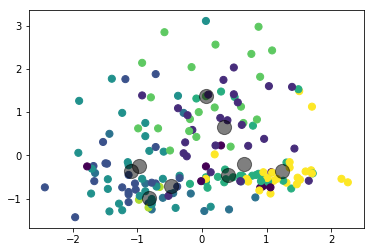

For n_clusters = 9, silhouette score is 0.14035373736325835)


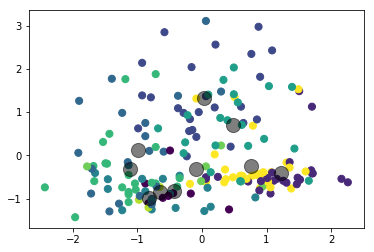

For n_clusters = 10, silhouette score is 0.14398677296462006)


In [17]:
#find the no of clusters
wcss = []
##elbow method to know the number of clusters
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    cluster_an=kmeans.predict(X_scaled)
    wcss.append(kmeans.inertia_)
    plt.scatter(X_scaled_array[:,0],X_scaled_array[:,1],c=cluster_an,s=50)
    centers=kmeans.cluster_centers_
    plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
    plt.show()
    score = silhouette_score (X_scaled, cluster_an, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(i, score))
    


    

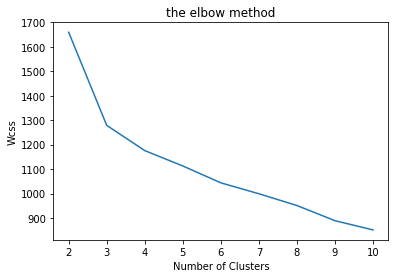

In [18]:
#plot the data for elbow method
plt.plot(range(2,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()